#Thermodynamics correlations 



En esta sección se presenta la clase 

In [15]:
import numpy as np
import pandas as pd
import pyther as pt
%matplotlib inline


In [23]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = 'METHANE'

Vapour_Pressure = thermodynamic_correlations.property_cal(component, "Vapour_Pressure")

print(Vapour_Pressure)



[   11687.01727042    13272.85149949    15029.23068614    16969.35018539
    19106.96477818    21456.38285049    24032.45929842    26850.58724692
    29926.68867467    33277.20404082    36919.08101219    40869.76239075
    45147.17334219    49769.708026      54756.21572669    60125.9865842
    65898.73701943    72094.59494793    78734.08487177    85838.11293615
    93427.952033     101525.22703025   110151.90020062   119330.25691941
   129082.89169635   139432.69460151   150402.83814105   162016.76463347
   174298.17413283   187271.01294051   200959.46274308   215387.93040918
   230581.03847449   246563.61633982   263360.69220351   280997.48574581
   299499.40157969   318892.023479     339201.10939226   360452.58724743
   382672.55155045   405887.26077811   430123.13556347   455406.75767023
   481764.86975062   509224.37587987   537812.34285877   567556.0022748
   598482.75331097   630620.16629095   663995.98694794   698638.14140435
   734574.74184875   771834.09289627   810444.6986182

In [4]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = 'METHANE'

temperature = 180.4

property_thermodynamics = thermodynamic_correlations.property_cal(component, "Vapour_Pressure", temperature)

print(property_thermodynamics)



Temperature_enter = [180.4]
Temperature_invalid = []
Temperature_valid = [180.4]
[ 3332655.37675131]


In [7]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = 'METHANE'

temperature = [180.4, 181.4, 185.3, 210, 85]

property_thermodynamics = thermodynamic_correlations.property_cal(component, "Vapour_Pressure", temperature)

print(property_thermodynamics)



Temperature_enter = [180.4, 181.4, 185.3, '210 K is a temperature not valid', '85 K is a temperature not valid']
Temperature_invalid = ['210 K is a temperature not valid', '85 K is a temperature not valid']
Temperature_valid = [180.4, 181.4, 185.3]
[ 3332655.37675131  3443422.60073251  3901608.02337537]


In [21]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = 'METHANE'

liquid_density = thermodynamic_correlations.property_cal(component, "Liquid_Density")
units = thermodynamic_correlations.units
temperature = thermodynamic_correlations.temperature

print("Liquid_Density = {0} {1}".format(liquid_density, units))
print(temperature)



Liquid_Density = [ 28.17994808  28.09601174  28.01172216  27.92707347  27.84205966
  27.75667451  27.67091168  27.58476461  27.49822658  27.41129068
  27.32394978  27.23619656  27.14802349  27.05942278  26.97038645
  26.88090625  26.79097368  26.70057997  26.60971608  26.51837268
  26.42654013  26.33420849  26.24136746  26.14800642  26.05411437
  25.95967995  25.86469138  25.76913647  25.67300259  25.57627666
  25.47894508  25.38099379  25.28240815  25.18317297  25.08327247
  24.98269023  24.88140916  24.77941148  24.67667866  24.57319138
  24.46892948  24.36387193  24.25799675  24.15128095  24.04370049
  23.9352302   23.82584369  23.71551328  23.60420992  23.49190307
  23.37856061  23.26414874  23.14863181  23.03197222  22.91413025
  22.79506388  22.67472864  22.55307738  22.43006001  22.30562332
  22.17971064  22.05226152  21.92321143  21.79249131  21.66002714
  21.52573943  21.38954265  21.25134458  21.11104554  20.96853755
  20.82370337  20.67641527  20.52653381  20.3739062   20.21

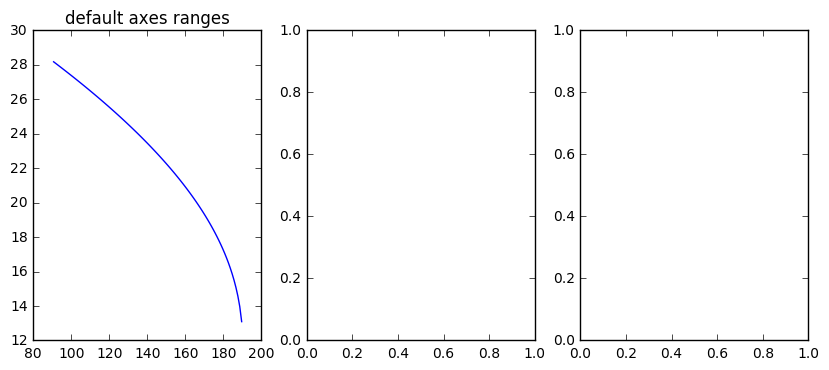

In [22]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
x = np.arange(0, 5, 0.25)
axes[0].plot(temperature, liquid_density)
axes[0].set_title("default axes ranges")

In [ ]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = 'METHANE'
#component = "ETHANE"
#component = "3-METHYLHEPTANE"
#component = "n-PENTACOSANE"
#component = "ISOBUTANE"
#component = "n-TETRADECANE"

temp = [180.4, 181.4, 185.3, 210, 85]
#temp = 180.4

#property_thermodynamics = thermodynamic_correlations.property_cal(component, Vapour_Pressure, temp)
#property_thermodynamics = property_cal(components, Vapour_Pressure, temp)
#property_thermodynamics = property_cal(component, Vapour_Pressure, [180.4, 181.4, 185.3, 210, 85])
property_thermodynamics = thermodynamic_correlations.property_cal(component, "Vapour_Pressure")

print(property_thermodynamics)

